<a href="https://colab.research.google.com/github/nihalhabeeb/rental_bike_demand_prediction/blob/main/Seoul_Bike_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Information:**

For a bike renting system to smoothly function, it is necessary to provide a stable supply of rental bikes at any given point of time according to the demand. This requires having a good prediction of the bike demand at each hour. The dataset contains the number of bikes rented per hour in the city of Seoul, date information as well as the weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall).

Data source: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand


**Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the dataset with latin1 encoding
df = pd.read_csv('/content/drive/MyDrive/Self Projects/Soul Bike Data/SeoulBikeData.csv', encoding = 'latin1')

## Data Cleaning

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no missing values in the dataset.

In [ ]:
# renaming columns for simplicity
df.rename(columns = {'Date':'date','Rented Bike Count':'rented_bike_count','Hour':'hour',
                     'Temperature(°C)':'temperature','Humidity(%)':'humidity',
                     'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility',
                     'Dew point temperature(°C)':'dew_point_temp','Solar Radiation (MJ/m2)':'solar_radiation',
                     'Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Seasons':'season','Holiday':'holiday',
                     'Functioning Day':'functioning_day'}, inplace = True)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# converting date to datetime format
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

# creating a new column for year
df['year'] = df['date'].apply(lambda x: x.year)

# creating a month column were month is represented by numbers
df['month'] = df['date'].apply(lambda x: x.month)

# creating another month column were month is represented by names
df['month_names'] = df['date'].apply(lambda x: x.strftime("%B"))

## Exploratory Data Analysis

Number of rented bikes in each year.

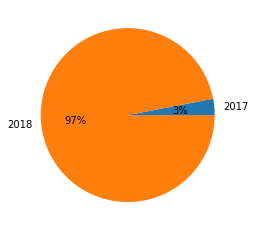

In [ ]:
# percentage of rented bikes in each year
plt.pie(df.groupby('year')['rented_bike_count'].sum(),labels=['2017','2018'],autopct='%.0f%%')
plt.show()

The total rented bike count is way higher in 2018. This is because most of the data is from that year.

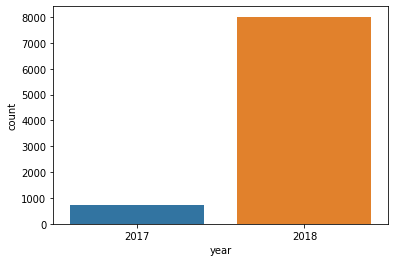

In [ ]:
# count of data from each year
sns.countplot(data = df, x = 'year')

Rented bikes in each month.

Text(0.5, 0, 'Months')

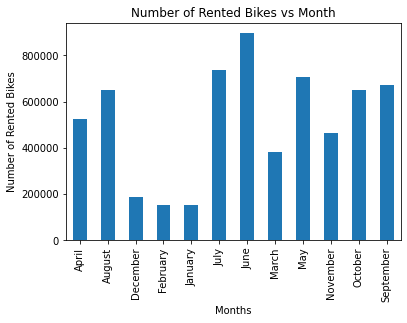

In [ ]:
# total rented bikes in each month
df.groupby('month_names')['rented_bike_count'].sum().plot(kind='bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Month')
plt.xlabel('Months')

June followed by July and May (summer season) has the most bikes rented. January, February and December (winter) has the least number of bikes rented.

The number of rented bikes in each hour (summed over the whole dataset by hour).

Text(0.5, 0, 'Hour')

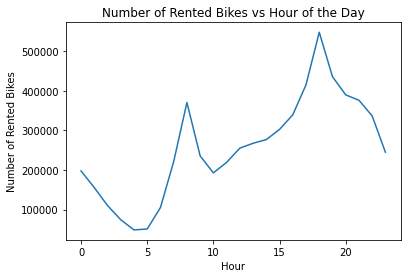

In [ ]:
# total rented bikes in each hour
df.groupby('hour')['rented_bike_count'].sum().plot(kind = 'line')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Hour of the Day')
plt.xlabel('Hour')

The peak time of the day in terms of bikes rented is around 4-7 pm in the evening. There is a smaller peak in the morning (around 7-9 am). The least activity is during the early morning period.

Number of rented bikes each season.

Text(0.5, 1.0, 'Number of Rented Bikes vs Season')

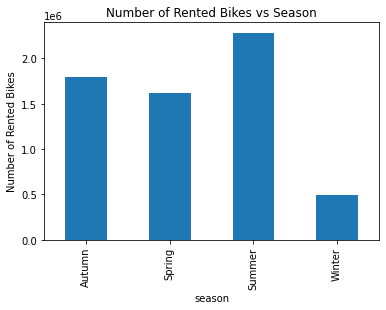

In [ ]:
# total rented bikes in each seasons
df.groupby('season')['rented_bike_count'].sum().plot(kind = 'bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Season')

Summer has highest activity and winter has the least activity.

Number of rented bikes by holiday.

Text(0.5, 1.0, 'Number of Rented Bikes vs Holiday')

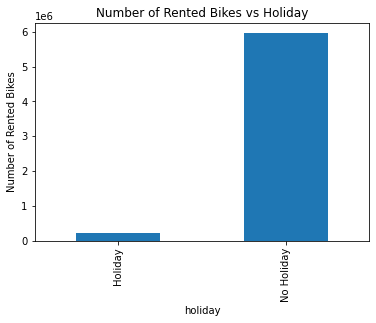

In [ ]:
# total rented bikes by holiday
df.groupby('holiday')['rented_bike_count'].sum().plot(kind = 'bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Holiday')

The number of rented bikes is very low on holidays

Looking at the non functioning days.

In [ ]:
# data from the days when the service is not functioning
df[df['functioning_day'] == 'No']

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month,month_names
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November


It is expected that the rented bike count will be zero on the days when the service is not functioning (the same count of data below shows that).

In [ ]:
# data count where the day is not functioning
df.loc[df['functioning_day'] == 'No'].shape

(295, 17)

In [ ]:
# data count where the day is not functioning and the count of rented bikes is zero
df.loc[(df['functioning_day'] == 'No') & (df['rented_bike_count'] == 0)].shape

(295, 17)

The data of non functioning days can be removed as the rental bike count is going to be zero those days. It does not help in predicting bike demands based on features (apart from the obvious fact that the bikes rented will be zero when the service is non functional). In addition, the model predictions can help decide if it is okay to stop the service on certain days (based on the demands). 

In [ ]:
# only including data where the day is functioning
df.drop(df[df['functioning_day'] == 'No'].index, inplace = True)

In [ ]:
# dropping the functioning_day column as it is now redundant
df.drop(columns = ['functioning_day'], axis = 1, inplace = True)

### Linear relationship between dependent and independent variables

In [ ]:
# making a copy of the dataset
data = df.copy()

In [ ]:
# list of numerical features
numerical_features = list(data.describe().columns)
numerical_features.remove('rented_bike_count')
numerical_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'year',
 'month']

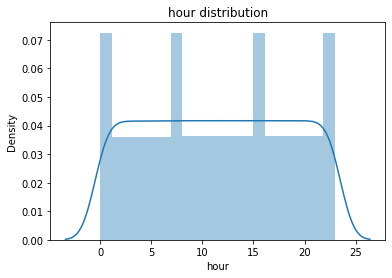

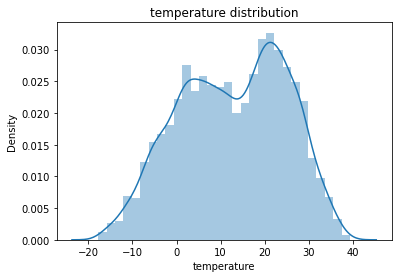

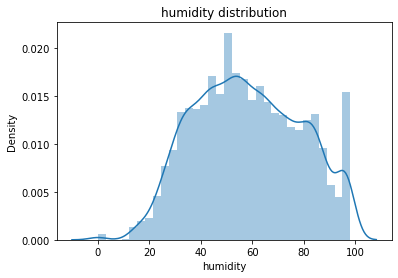

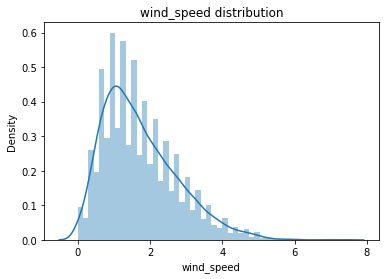

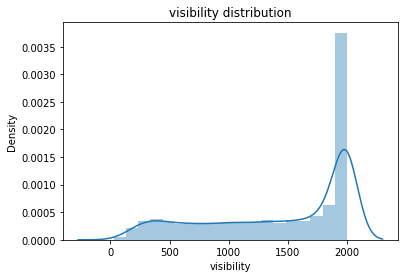

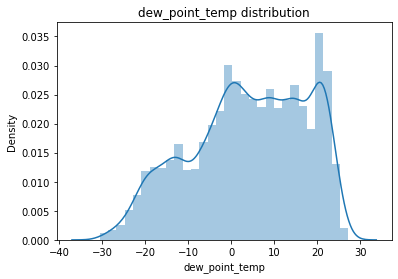

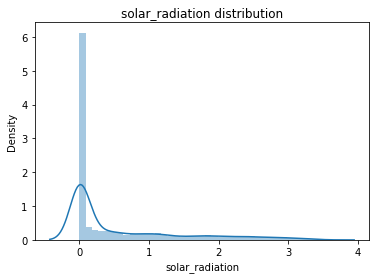

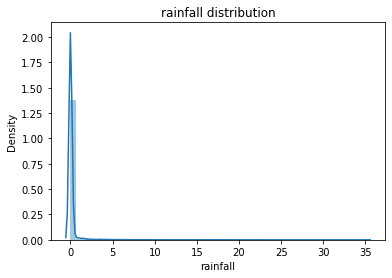

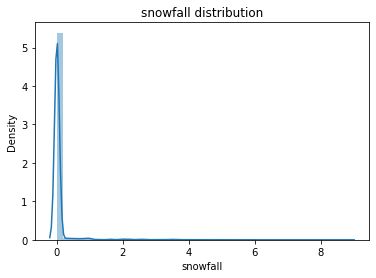

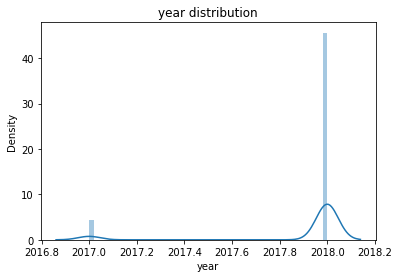

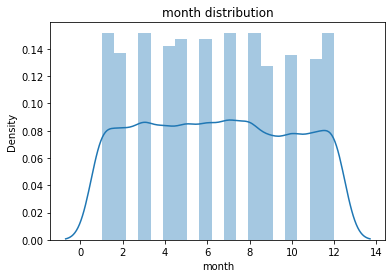

In [ ]:
# distribution of each features
for column in numerical_features:
  sns.distplot(data[column])
  plt.title(column + ' distribution')
  plt.show()

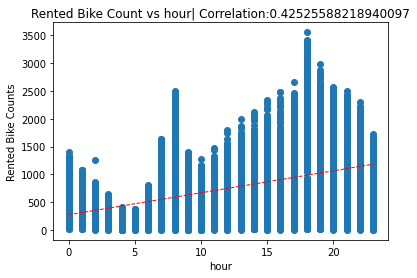

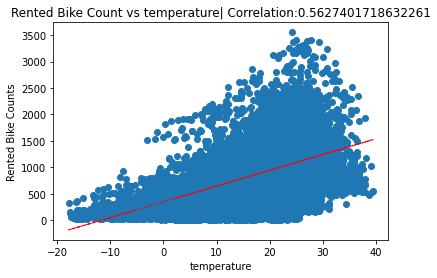

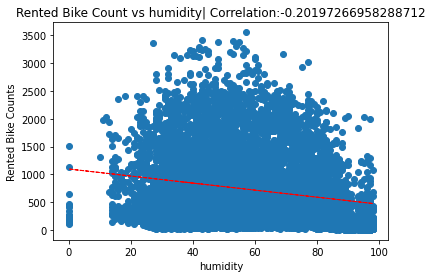

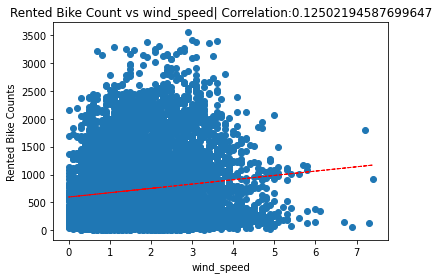

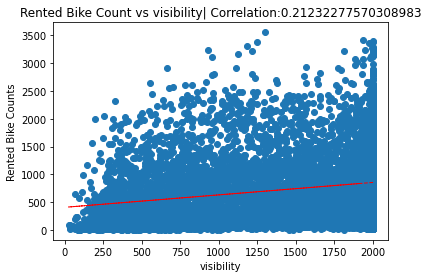

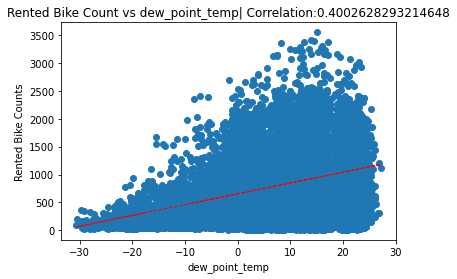

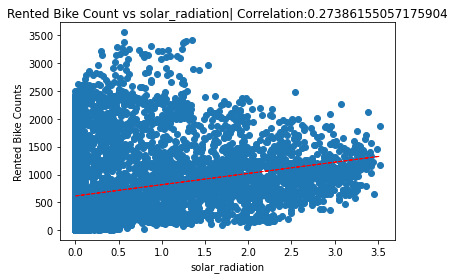

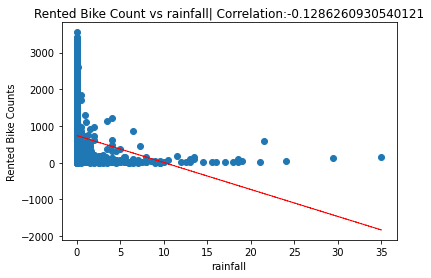

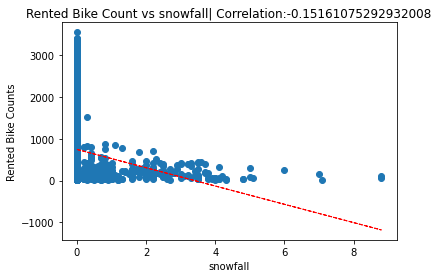

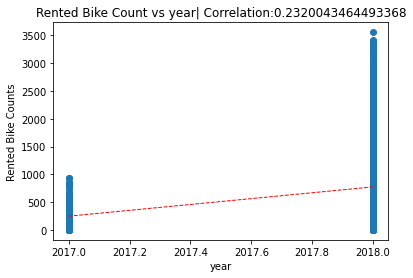

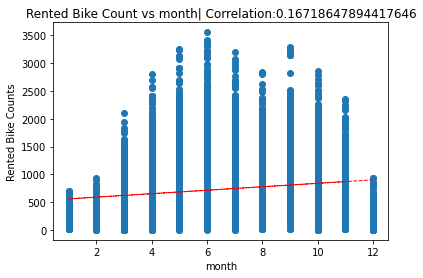

In [ ]:
for column in numerical_features:
  # plotting the relationship between dependent and independent variables
  plt.scatter(data[column], data['rented_bike_count'])
  # correlation
  correlation = data[column].corr(data['rented_bike_count'])
  plt.title('Rented Bike Count vs ' + column + "| Correlation:" + str(correlation))
  plt.xlabel(column)
  plt.ylabel('Rented Bike Counts')
  # plotting the best fit line for each relationship
  slope, intercept = np.polyfit(data[column], data['rented_bike_count'], 1)
  plt.plot(data[column], slope*data[column] + intercept, "r--", lw = 1)
  plt.show()

Snowfall and Rainfall variables don't have a linear relationship with the target variable.

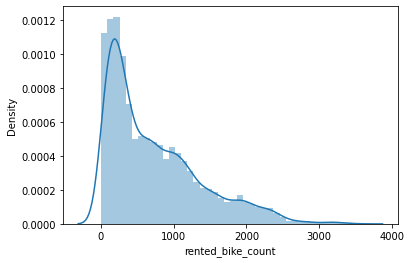

In [ ]:
# distribution of the target variable
sns.distplot(data['rented_bike_count'])

The distribution is skewed and we can try taking a log transformation.

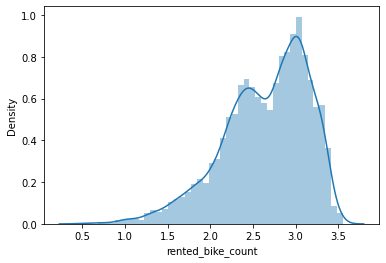

In [ ]:
# distribution of log transformation of target variable
sns.distplot(np.log10(data['rented_bike_count']+1))

The log transformation is skewed as well.

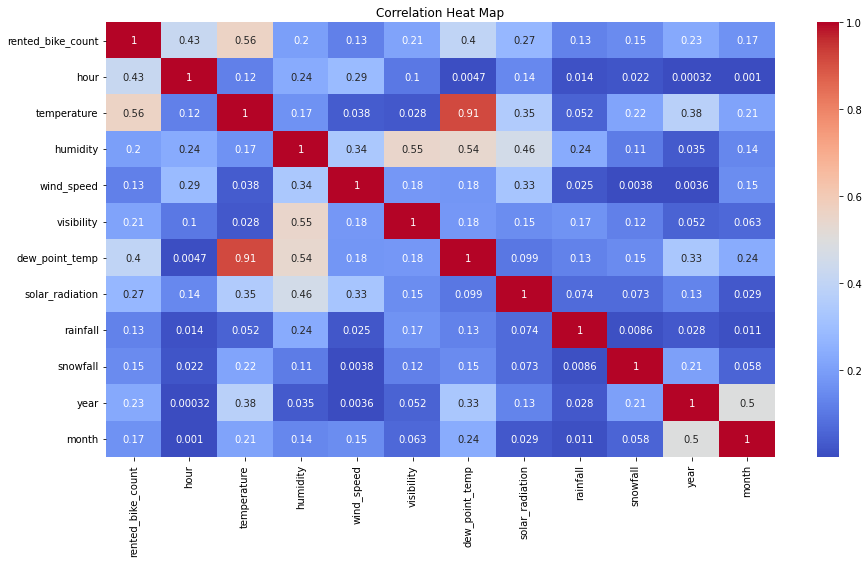

In [ ]:
# correlation heatmap
plt.figure(figsize=(15,8))
plt.title("Correlation Heat Map")
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Temperature and dew point temperature are highly correlated. We will be removing dew point temperature.

In [ ]:
selected_num_features = ['hour','temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall', 'month']

### Categorical features

In [ ]:
# descriptive statistics of categorical variables
data.describe(include = ['category','object'])

,season,holiday,month_names
count,8465,8465,8465
unique,4,2,12
top,Summer,No Holiday,December
freq,2208,8057,744


## Fitting models

### Linear Regression

The categorical data types can be converted to integers.

In [ ]:
# label encoding
label_encoders = {"holiday":{"No Holiday":0,"Holiday":1}}
data = data.replace(label_encoders)

We can create dummy variables for each category of season column (but we will only include three of those as the information of the fourth one is included in the rest, hence the drop_first = True argument).

In [ ]:
# one hot encoding
data = pd.get_dummies(data, columns=["season"], prefix=["season"], drop_first=True)

In [ ]:
data.tail()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,holiday,year,month,month_names,season_Spring,season_Summer,season_Winter
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,2018,11,November,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,2018,11,November,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,2018,11,November,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,2018,11,November,0,0,0
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,0,2018,11,November,0,0,0


In [ ]:
# removing snowfall and rainfall (as they don't have a linear relationship with the dependent variable.)
selected_num_features.remove('snowfall')
selected_num_features.remove('rainfall')
selected_num_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'month']

In [ ]:
# including the categorical variables
selected_num_features.extend(['holiday','season_Spring','season_Summer','season_Winter'])
selected_num_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'month',
 'holiday',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [ ]:
# defining data of independent variables and dependent variable
X = data[selected_num_features]
y = data['rented_bike_count']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [ ]:
# scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# fitting the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# r2 score for training set
linear_regressor.score(X_train,y_train)

0.534370487444807

In [ ]:
# r2 score for testing set
linear_regressor.score(X_test,y_test)

0.5117558744340127

In [ ]:
linear_regressor.intercept_

241.76677172743376

In [ ]:
linear_regressor.coef_

array([ 640.84533526, 1548.5725967 , -904.45551662,  123.52385395,
         28.53701739, -300.85179337,   56.06544079, -129.46097105,
       -108.60079068, -143.30198688, -330.23604208])

In [ ]:
# predicting using the model
y_pred = linear_regressor.predict(X_test)
y_train_pred = linear_regressor.predict(X_train)

In [ ]:
# performance metrics for testing set
print('Performance metrics for Testing dataset')
# root mean squared error
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
print('R2 score:', r2_score(y_test, y_pred))

Performance metrics for Testing dataset
RMSE: 454.3735647954152
R2 score: 0.5117558744340127


In [ ]:
# performance metrics for training set
print('Performance metrics for Training dataset')
# root mean squared error
print('RMSE:', math.sqrt(mean_squared_error(y_train, y_train_pred)))
# r2 score
print('R2 score:', r2_score(y_train, y_train_pred))

Performance metrics for Training dataset
RMSE: 436.9096921808084
R2 score: 0.534370487444807


The model is only able to explain around 51% of the variation in the dependent variable in case of the testing dataset and 53 % in case of training dataset. The performance of the model on both training and testing datasets are fairly similar.

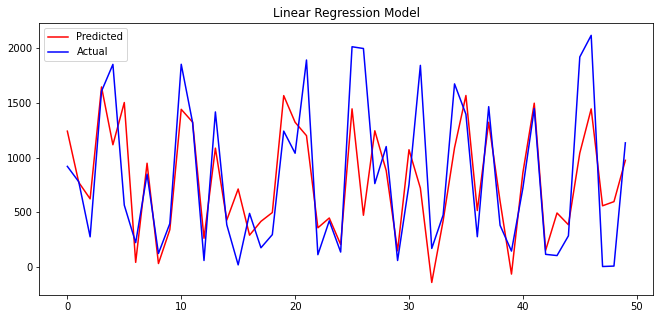

In [ ]:
# Visualising the Linear Regression Results
# x axis is the index of the target variable values
y_index = np.arange(0, y_test.shape[0])

plt.figure(figsize = (11,5))
# only conidering the first 50 values for clean visualisation
# predicted
plt.plot(y_index[0:50], y_pred[0:50], color = 'red')
# actual
plt.plot(y_index[0:50], y_test[0:50], color = 'blue')
plt.title('Linear Regression Model')
plt.legend(['Predicted', 'Actual'])
plt.show()

### Decision Tree Regressor

Let us train the data with a Decision Tree Regression model.

In [ ]:
# making a new copy of the dataset
data2 = df.copy()

We will drop the year and date columns and only keep month information. We do not want mutliple columns providing correlated information. Also, there are only two years in the data, hence, the information is limited.

In [ ]:
# dropping date and year columns
data2.drop(['date','year'], axis = 1, inplace = True)

Scikit-learn DecisionTreeRegressor accepts only numerical values. The categorical values have to be converted to numerical form.

In [ ]:
# label encoding
label_encoders = {"holiday":{"No Holiday":0,"Holiday":1}, "season":{"Winter":0,"Spring":1,"Summer":2,"Autumn":3}}
data2 = data2.replace(label_encoders)

### Decision tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
independent_variables = ['hour','temperature','humidity','wind_speed','visibility','dew_point_temp','solar_radiation','rainfall','snowfall','season','holiday','month']

In [ ]:
# dataset of independent variables
X2 = data2[independent_variables]
# dataset of dependent variables
y2 = data2['rented_bike_count']

In [ ]:
print(X2.shape)
print(y2.shape)

(8465, 12)
(8465,)


In [ ]:
# splitting the data to training and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=1)

In [ ]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(5671, 12)
(5671,)
(2794, 12)
(2794,)


We will be using GridSearchCV for hyperparameter tuning and cross validation.

In [ ]:
# GridSearchCV for hyperparameter tuning

decision_tree_reg = DecisionTreeRegressor()
grid_parameters = {"max_depth": [3, 5, 7], "max_leaf_nodes": [None, 50, 60, 70, 80, 90], "min_samples_leaf":[7,8,9,10]}

regressor_model = GridSearchCV(decision_tree_reg, param_grid = grid_parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# fitting the model
regressor_model.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# best hyperparameters
regressor_model.best_params_

{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 8}

In [ ]:
# best score (negative mean squared error)
regressor_model.best_score_

-85211.55815699595

In [ ]:
# prediction
y_train_pred2 = regressor_model.predict(X_train2)
y_pred2 = regressor_model.predict(X_test2)

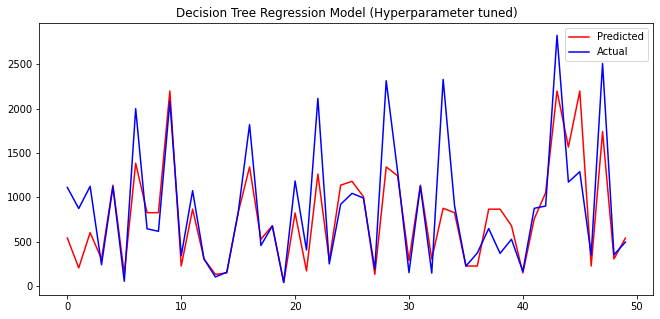

In [ ]:
# Visualising the Decision Tree Regression Results
# x axis is the index of the target variable values
y_index = np.arange(0, y_test2.shape[0])

plt.figure(figsize = (11,5))
# only conidering the first 50 values for clean visualisation
# predicted
plt.plot(y_index[0:50], y_pred2[0:50], color = 'red')
# actual
plt.plot(y_index[0:50], y_test2[0:50], color = 'blue')

plt.title('Decision Tree Regression Model (Hyperparameter tuned)')
plt.legend(['Predicted', 'Actual'])
plt.show()

There are a few cases where the difference between actual and predicted values are fairly high (in the range of 500) while most cases have lesser variation.

In [ ]:
# performance metrics for testing set
print('Performance metrics for Testing dataset')
# r2_score
print("r2 score:",r2_score(y_test2,y_pred2))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_test2,y_pred2)))

Performance metrics for Testing dataset
r2 score: 0.7805191405790043
RMSE: 304.0104231418782


In [ ]:
# performance metrics for training set
print('Performance metrics for Training dataset')
# r2_score
print("r2 score:",r2_score(y_train2,y_train_pred2))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_train2,y_train_pred2)))

Performance metrics for Training dataset
r2 score: 0.8328601459379475
RMSE: 261.2260801680112


This model gives an R2 score of 77% on testing set and 83% on training set. It performs a little better on training data (there is some overfitting).

### Visualising Decision Tree

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
import graphviz
from IPython.display import display

We can create a single Decision Tree model with the best hyperparameters we got using GridSearchCV.

In [ ]:
# fitting the model
decision_tree_model = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes = None, min_samples_leaf = 8)
decision_tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8)

In [ ]:
# prediction
y_train_pred3 = decision_tree_model.predict(X_train2)
y_pred3 = decision_tree_model.predict(X_test2)

In [ ]:
# performance metrics for testing set
# r2_score
print("r2 score:",r2_score(y_test2,y_pred3))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_test2,y_pred3)))

r2 score: 0.7805191405790043
RMSE: 304.0104231418782


In [ ]:
# performance metrics for training set
# r2_score
print("r2 score:",r2_score(y_train2,y_train_pred3))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_train2,y_train_pred3)))

r2 score: 0.8328601459379475
RMSE: 261.2260801680112


We can see the performance is same as the hyperparameter tuned and cross validated model since this model is using the best hyperparameters.

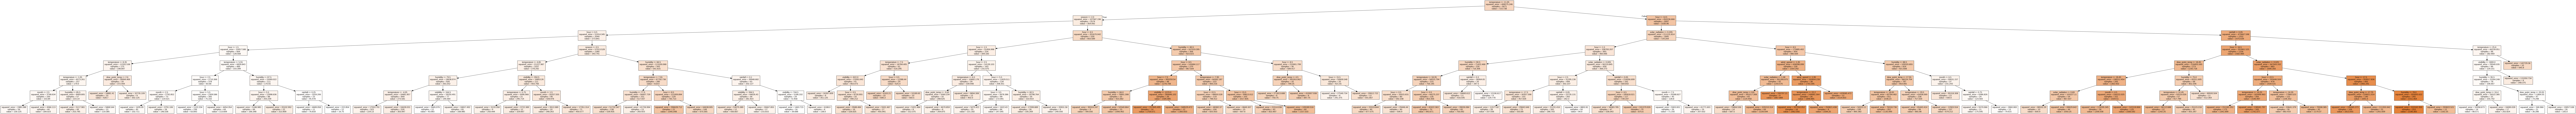

In [ ]:
# visualising decision tree
dot_data = export_graphviz(decision_tree_model, feature_names=X_train2.columns, filled=True, out_file=None)
graph = graphviz.Source(dot_data)
png_img = graph.pipe(format='png')
# with open('dtree_pipe.png','wb') as f:
#     f.write(png_bytes)
from IPython.display import Image
Image(png_img)